In [1]:
import numpy as np
from scipy import misc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import cv2
import glob
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as matimage
%matplotlib inline 

# Read train and test datasets

In [2]:
train = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('fashionmnist/fashion-mnist_test.csv')

In [3]:
X_train = np.array(train.iloc[:, 1:])
y_train = np.array(train.iloc[:, 0]) # target values of training dataset
X_test =  np.array(test.iloc[:, 1:])
y_test = np.array(test.iloc[:, 0]) # target values of testing dataset
train.shape

(60000, 785)

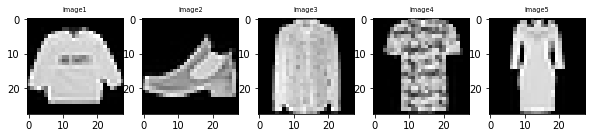

In [4]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

# Preprocessing Normalized all of the datasets


In [5]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

/home/snow/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/snow/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/snow/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/snow/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


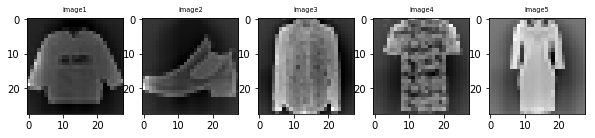

In [6]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

# Find eigenvectors and eigenvalues, compute covariance matrix

In [7]:
mean_vec = np.mean(X_train, axis=0)
cov_mat = np.cov(X_train.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Shape of Covariance matrix", cov_mat.shape)
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse=True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

Shape of Covariance matrix (784, 784)


In [8]:
add =0.0
for i in range(400):
    add+= var_exp[i]

print('first 400 components average variance: %.2f' % add)  

first 400 components average variance: 97.76


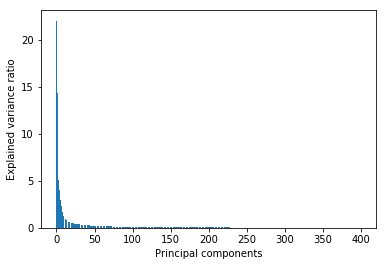

In [9]:
size = 400
plt.figure(figsize=(6,4))
plt.bar(range(size), var_exp[0:size], align='center');
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio");

# Using PCA reduce dimensionality


In [10]:
from sklearn.decomposition import PCA

n_components = 400
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

Eigenvalues shape: (400, 784)


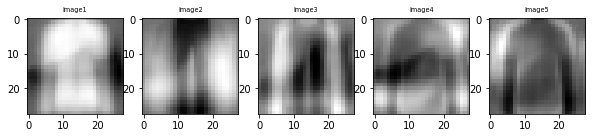

In [11]:
eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_
print("Eigenvalues shape:", eigenvalues.shape)

n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(eigenvalues[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

# Classification

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Gaussian classifier


In [13]:
gNB = GaussianNB()
gNB.fit(X_train_pca,y_train)
nb_predict = gNB.predict(X_test_pca)

print(metrics.classification_report(y_test, nb_predict))
print("train accuracy: ", gNB.score(X_train_pca, y_train))
print("test accuracy: ", gNB.score(X_test_pca, y_test))

              precision    recall  f1-score   support

           0       0.58      0.37      0.45      1000
           1       0.62      0.78      0.69      1000
           2       0.41      0.28      0.33      1000
           3       0.64      0.48      0.55      1000
           4       0.35      0.68      0.46      1000
           5       0.53      0.40      0.46      1000
           6       0.09      0.10      0.10      1000
           7       0.70      0.61      0.65      1000
           8       0.46      0.63      0.53      1000
           9       0.72      0.41      0.52      1000

   micro avg       0.47      0.47      0.48     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000

train accuracy:  0.5734166666666667
test accuracy:  0.475


# SVM classifier with default parameters

In [14]:
svm = SVC()
svm.fit(X_train_pca,y_train)
svm_predict = svm.predict(X_test_pca)

print(metrics.classification_report(y_test, svm_predict))
print("train accuracy: ", svm.score(X_train_pca, y_train))
print("test accuracy: ", svm.score(X_test_pca, y_test))

/home/snow/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1000
           1       0.99      0.89      0.94      1000
           2       0.56      0.46      0.51      1000
           3       0.78      0.83      0.81      1000
           4       0.64      0.66      0.65      1000
           5       0.90      0.67      0.77      1000
           6       0.44      0.44      0.44      1000
           7       0.77      0.86      0.82      1000
           8       0.79      0.97      0.87      1000
           9       0.83      0.84      0.83      1000

   micro avg       0.74      0.74      0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

train accuracy:  0.9416
test accuracy:  0.7424


# MLP classifier with default parameters

In [15]:
MLP= MLPClassifier()
MLP.fit(X_train_pca,y_train)
mlp_predict = MLP.predict(X_test_pca)

print(metrics.classification_report(y_test, mlp_predict))
print("train accuracy: ", MLP.score(X_train_pca, y_train))
print("test accuracy: ", MLP.score(X_test_pca, y_test))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63      1000
           1       0.94      0.87      0.91      1000
           2       0.40      0.46      0.43      1000
           3       0.72      0.62      0.67      1000
           4       0.51      0.41      0.45      1000
           5       0.68      0.56      0.62      1000
           6       0.31      0.36      0.34      1000
           7       0.72      0.68      0.70      1000
           8       0.82      0.87      0.85      1000
           9       0.75      0.77      0.76      1000

   micro avg       0.63      0.63      0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000

train accuracy:  1.0
test accuracy:  0.6316


# Preprocessing binarizer


In [16]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()
train_binary = binarizer.fit_transform(X_train) 
test_binary = binarizer.fit_transform(X_test)
train_binary.shape

(60000, 784)

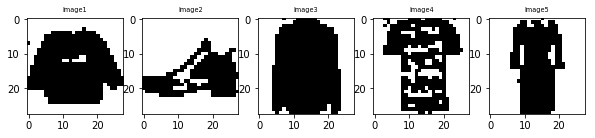

In [17]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(train_binary[i,:].reshape(28,28), cmap="binary")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

# Gaussian classifier


In [18]:
gNB = GaussianNB()
gNB.fit(train_binary,y_train)
nb_predict = gNB.predict(test_binary)

print(metrics.classification_report(y_test, nb_predict))
accuracy = metrics.accuracy_score(y_test, nb_predict)
average_accuracy = np.mean(y_test == nb_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1000
           1       0.68      0.94      0.79      1000
           2       0.63      0.42      0.50      1000
           3       0.46      0.58      0.52      1000
           4       0.43      0.70      0.53      1000
           5       0.84      0.26      0.40      1000
           6       0.40      0.14      0.20      1000
           7       0.49      0.97      0.65      1000
           8       0.82      0.73      0.77      1000
           9       0.89      0.60      0.72      1000

   micro avg       0.60      0.60      0.60     10000
   macro avg       0.64      0.60      0.58     10000
weighted avg       0.64      0.60      0.58     10000

The average_accuracy is 60.4%


In [19]:
svm = SVC()
svm.fit(train_binary,y_train)
svm_predict = svm.predict(test_binary)

print(metrics.classification_report(y_test, svm_predict))
accuracy = metrics.accuracy_score(y_test, svm_predict)
average_accuracy = np.mean(y_test == svm_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

/home/snow/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.80      0.77      0.78      1000
           3       0.85      0.91      0.88      1000
           4       0.78      0.83      0.80      1000
           5       0.93      0.92      0.92      1000
           6       0.70      0.60      0.65      1000
           7       0.89      0.90      0.90      1000
           8       0.95      0.96      0.96      1000
           9       0.93      0.93      0.93      1000

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

The average_accuracy is 86.1%


# MLP we use only one layer and 100 neurons


In [20]:
MLP= MLPClassifier()
MLP.fit(train_binary,y_train)
mlp_predict = MLP.predict(test_binary)

print(metrics.classification_report(y_test, mlp_predict))
accuracy = metrics.accuracy_score(y_test, mlp_predict)
average_accuracy = np.mean(y_test == mlp_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1000
           1       0.97      0.98      0.98      1000
           2       0.77      0.75      0.76      1000
           3       0.89      0.89      0.89      1000
           4       0.77      0.74      0.75      1000
           5       0.95      0.93      0.94      1000
           6       0.62      0.70      0.66      1000
           7       0.92      0.92      0.92      1000
           8       0.95      0.95      0.95      1000
           9       0.93      0.95      0.94      1000

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

The average_accuracy is 85.7%


In [ ]:
## Gausian Naive Bayes
print("[NB] train accuracy: ", gNB.score(train_binary, y_train))
print("[NB] test accuracy: ", gNB.score(test_binary, y_test))

## SVM
print("[SVM] train accuracy: ", svm.score(train_binary, y_train))
print("[SVM] test accuracy: ", svm.score(test_binary, y_test))

## MLP
print("[MLP] train accuracy: ", MLP.score(train_binary, y_train))
print("[MLP] test accuracy: ", MLP.score(test_binary, y_test))